In [77]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [78]:
data=pd.read_csv("credit_train.csv")
#finding the number of rows and columns
data.shape

(100514, 19)

In [79]:
#lists the sum of null values in every column of the dataset
data.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [80]:
##Dropping Loan Status Null Values and Labeling it
data.dropna(subset=["Loan Status"],inplace=True)
le=preprocessing.LabelEncoder()
data["Loan Status"]=le.fit_transform(data["Loan Status"])

In [81]:
data["Term"].replace(("Short Term","Long Term"),[0,1],inplace=True)
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,1,445412.0,0,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,1,262328.0,0,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,1,99999999.0,0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,1,347666.0,1,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,1,176220.0,0,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [82]:
data['Credit Score']=data['Credit Score'].apply(lambda val: (val/10) if val>850 else val)

In [83]:
do_nothing=lambda: None
cscoredf=data[data['Term']==0]
stermAVG=cscoredf['Credit Score'].mean()
lscoredf=data[data['Term']==1]
ltermAVG=lscoredf['Credit Score'].mean()
data.loc[(data.Term==0)&(data['Credit Score'].isnull()),'Credit Score']=stermAVG
data.loc[(data.Term==1)&(data['Credit Score'].isnull()),'Credit Score']=ltermAVG

In [84]:
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Poor" if np.isreal(val)
                                                  and val < 580 else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Average" if np.isreal(val)
                                                  and (val >= 580 and val < 670) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Good" if np.isreal(val) 
                                                  and (val >= 670 and val < 740) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Very Good" if np.isreal(val) 
                                                  and (val >= 740 and val < 800) else val)
data['Credit Score'] = data['Credit Score'].apply(lambda val: "Exceptional" if np.isreal(val) 
                                                  and (val >= 800 and val <= 850) else val)

<AxesSubplot:title={'center':'Number of loans in terms of Credit Score category'}>

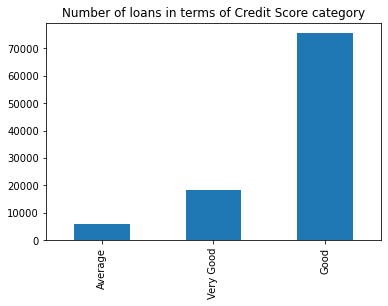

In [85]:
data['Credit Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

In [86]:
print("There are",data['Annual Income'].isna().sum(), "Missing Annual Income Values.")
# By appplying mean we fill the null values
data['Annual Income'].fillna(data['Annual Income'].mean(), inplace=True)
data.shape

There are 19154 Missing Annual Income Values.


(100000, 19)

In [87]:
from collections import Counter as c
print(c(data['Credit Score']))  #returns the class count values

Counter({'Good': 75506, 'Very Good': 18479, 'Average': 6015})


In [88]:
data['Credit Score'] = le.fit_transform(data['Credit Score'])  #applying label encoder
c(data['Credit Score'])

Counter({1: 75506, 2: 18479, 0: 6015})

<AxesSubplot:title={'center':'Number of Loan based on Home ownership'}>

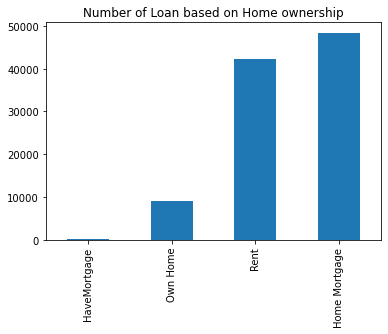

In [89]:
data['Home Ownership'].value_counts().sort_values(ascending = True).plot(kind='bar', title="Number of Loan based on Home ownership")

In [90]:
print(c(data['Home Ownership']))
data['Home Ownership'] = le.fit_transform(data['Home Ownership'])
print(c(data['Home Ownership']))

Counter({'Home Mortgage': 48410, 'Rent': 42194, 'Own Home': 9182, 'HaveMortgage': 214})
Counter({1: 48410, 3: 42194, 2: 9182, 0: 214})


In [91]:
data['Years in current job']=data['Years in current job'].str.extract(r"(\d+)")
data['Years in current job'] = data['Years in current job'].astype(float)

In [92]:
expmean = data['Years in current job'].mean()

In [93]:
data['Years in current job'].fillna(expmean, inplace=True)

In [94]:
data['Years in current job'].fillna(expmean, inplace=True)

In [95]:
data = data.drop(['Loan ID','Customer ID','Purpose'], axis=1)

In [96]:
data['Credit Problems'] = data['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x==0 
                        else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))

In [97]:
print(c(data['Credit Problems']))
data['Credit Problems'] = le.fit_transform(data['Credit Problems'])
print(c(data['Credit Problems']))

Counter({'No Credit Problem': 86035, 'Some Credit promblem': 13879, 'Major Credit Problems': 86})
Counter({1: 86035, 2: 13879, 0: 86})


In [98]:
data['Credit Age'] = data['Years of Credit History'].apply(lambda x: "Short Credit Age" if x<5 
                                else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [99]:
print(c(data['Credit Age']))
data['Credit Age'] = le.fit_transform(data['Credit Age'])
print(c(data['Credit Age']))

Counter({'Exceptional Credit Age': 49958, 'Good Credit Age': 49848, 'Short Credit Age': 194})
Counter({0: 49958, 1: 49848, 2: 194})


In [100]:
data = data.drop(['Months since last delinquent','Number of Open Accounts',
                  'Maximum Open Credit','Current Credit Balance','Monthly Debt'],axis=1)

In [101]:
data['Tax Liens'] = data['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0
                                else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))

In [102]:
print(c(data['Tax Liens']))
data['Tax Liens'] = le.fit_transform(data['Tax Liens'])
print(c(data['Tax Liens']))

Counter({'No Tax Lien': 98062, 'Some Tax Liens': 1717, 'Many Tax Liens': 221})
Counter({1: 98062, 2: 1717, 0: 221})


In [103]:
data['Bankruptcies'] = data['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 
                            else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))

In [104]:
print(c(data['Bankruptcies']))
data['Bankruptcies'] = le.fit_transform(data['Bankruptcies'])
print(c(data['Bankruptcies']))

Counter({'No bankruptcies': 88774, 'Some Bankruptcies': 10892, 'Many Bankruptcies': 334})
Counter({1: 88774, 2: 10892, 0: 334})


In [105]:
meanxoutlier = data[data['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
stddevxoutlier = data[data['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [106]:
data['Annual Income'] = data['Annual Income'].apply(lambda x: "Low Income" if x<=poorline 
                            else ("Average Income" if x>poorline and x<richline else "High Income"))

In [107]:
print(c(data['Annual Income']))
data['Annual Income'] = le.fit_transform(data['Annual Income'])
print(c(data['Annual Income']))

Counter({'Average Income': 86004, 'High Income': 9145, 'Low Income': 4851})
Counter({0: 86004, 1: 9145, 2: 4851})


In [108]:
y = data['Loan Status']
X = data.drop(['Loan Status'],axis=1)

In [109]:
lmeanxoutlier = data[data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstddevxoutlier = data[data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)

126051.43019084723 498575.76557037106


In [110]:
data['Current Loan Amount'] = data['Current Loan Amount'].apply(lambda x: "Small Loan" if x<=lowrange 
                            else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

In [111]:
print(c(data['Current Loan Amount']))
data['Current Loan Amount'] = le.fit_transform(data['Current Loan Amount'])
print(c(data['Current Loan Amount']))

Counter({'Medium Loan': 60112, 'Big Loan': 26506, 'Small Loan': 13382})
Counter({1: 60112, 0: 26506, 2: 13382})


In [112]:
data.shape

(100000, 13)

In [113]:
y = data['Loan Status']
X = data.drop(['Loan Status'],axis=1)

In [114]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Years of Credit History,Number of Credit Problems,Bankruptcies,Tax Liens,Credit Problems,Credit Age
0,1,1,0,1,0,8.0,1,17.2,1.0,2,1,2,0
1,1,1,0,1,0,10.0,1,21.1,0.0,1,1,1,0
2,1,0,0,2,1,8.0,2,14.9,1.0,1,1,2,1
3,1,1,1,1,0,3.0,2,12.0,0.0,1,1,1,1
4,1,1,0,1,0,5.0,3,6.1,0.0,1,1,1,1


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [116]:
#By using DecisionTree we are fitting the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [117]:
y_pred_dt =dt.predict(X_test)  #prediction
c(y_pred_dt)

Counter({0: 6720, 1: 26280})

In [118]:
import pickle    #importing the pickle file

pickle.dump(dt,open('loan.pkl','wb'))    #Dumping the model into the pickle file